In [1]:
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sys
sys.path.append('..')
import torch
import torch.backends.cudnn as cudnn
import torchvision
import matplotlib.pyplot as plt
from src.models import VGG19
from src.dataloader import EuroSatDownloader, createEuroSatDataLoaders, createMiniImageNetDataLoaders, MiniImageNetDownloader
cudnn.benchmark = True
plt.ion()
import cv2
import numpy as np

from torchvision import datasets, models, transforms
from src.modelvis import imshow, display_images_grid_from_dataloader, calculate_rgb_statistics_for_folder, calculate_rgb_statistics, calculate_folder_statistics, getmean_Stddev

In [3]:
extractDir = '..\\data\\miniImageNet'
url = 'https://drive.usercontent.google.com/download?id=107FTosYIeBn5QbynR46YG91nHcJ70whs&export=download&authuser=0&confirm=t&uuid=a50f1fb0-d0de-4900-905d-bab7437a3ec8&at=APZUnTXEKGryF0vQqVJF4LvHHCT1:1704557194939'
downloader = MiniImageNetDownloader(url, extractDir)
downloader.download()

2024-01-07 07:08:50,207 - INFO - MiniImageNet database already exists.


In [4]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
        transforms.RandomHorizontalFlip(),
        transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]),
}

dataDir = '..\\data\\miniImageNet\\train'
dataloaders, class_names, dataset_sizes = createMiniImageNetDataLoaders(data_transforms, dataDir, split=0.8, batch_size=4)
class_names_list = list(class_names)

In [5]:
print(len(class_names_list))

64


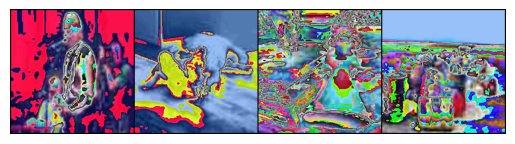

['n02747177', 'n03527444', 'n02108915', 'n02108915']


In [6]:
t_inputs, classes = next(iter(dataloaders['train']))
out_t = torchvision.utils.make_grid(t_inputs)
imshow(out_t)
print([class_names_list[x] for x in classes])

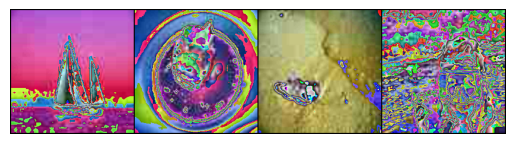

['n04243546', 'n04435653', 'n01843383', 'n03337140']


In [7]:
inputs_test, classes_test = next(iter(dataloaders['test']))
out_test = torchvision.utils.make_grid(inputs_test)
imshow(out_test)
print([class_names_list[x] for x in classes_test])

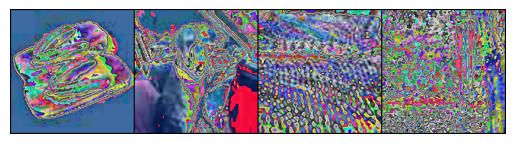

['n03047690', 'n02457408', 'n02795169', 'n02165456']


In [8]:
inputs_val, classes_val = next(iter(dataloaders['val']))
out_val = torchvision.utils.make_grid(inputs_val)
imshow(out_val)
print([class_names_list[x] for x in classes_val])

In [9]:
print(dataloaders['train'].dataset.transform)

Compose(
    Resize(size=224, interpolation=bilinear)
    ColorJitter(brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=None)
    RandomHorizontalFlip(p=0.5)
    GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)


In [10]:
print(dataloaders['test'].dataset.transform)

Compose(
    Resize(size=224, interpolation=bilinear)
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)


In [11]:
print(dataloaders['val'].dataset.transform)

Compose(
    Resize(size=224, interpolation=bilinear)
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)


In [12]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
        transforms.RandomHorizontalFlip(),
        transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
    ]),
}

dataDir = '..\\data\\miniImageNet\\train'
dataloaders_nn, class_names, dataset_sizes = createMiniImageNetDataLoaders(data_transforms, dataDir, split=0.8, batch_size=4)
class_names_list = list(class_names)

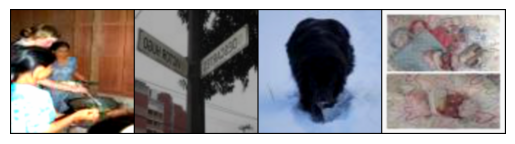

['n04243546', 'n04435653', 'n01843383', 'n03337140']


In [13]:
t_inputs_nn, classes = next(iter(dataloaders_nn['train']))
out_t_nn = torchvision.utils.make_grid(t_inputs_nn)
imshow(out_t_nn)
print([class_names_list[x] for x in classes_test])

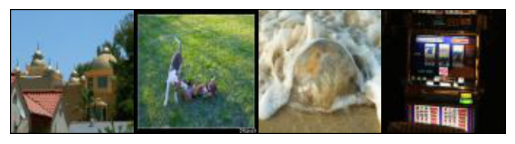

['n02687172', 'n04389033', 'n02101006', 'n02108551']


In [14]:
inputs_test_nn, classes_test = next(iter(dataloaders_nn['test']))
out_test_nn = torchvision.utils.make_grid(inputs_test_nn)
imshow(out_test_nn)
print([class_names_list[x] for x in classes])

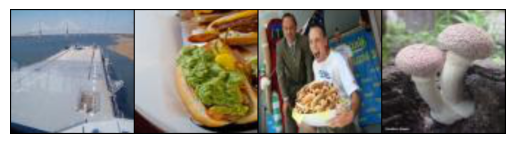

['n04515003', 'n04296562', 'n04296562', 'n02105505']


In [15]:
inputs_val_nn, classes_val = next(iter(dataloaders_nn['val']))
out_val_nn = torchvision.utils.make_grid(inputs_val_nn)
imshow(out_val_nn)
print([class_names_list[x] for x in classes_val])

In [16]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
}

dataDir = '..\\data\\EuroSAT_RGB'
dataloaders_eu, class_names_eu, _ = createEuroSatDataLoaders(data_transforms, dataDir, split=0.25, batch_size = 4)
class_names_eu_li = list(class_names_eu)
class_names_list = list(class_names_eu)

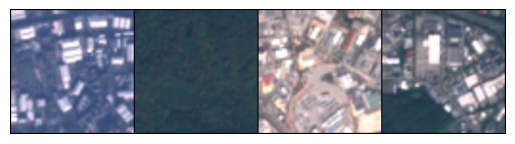

['HerbaceousVegetation', 'SeaLake', 'HerbaceousVegetation', 'HerbaceousVegetation']


In [17]:
inputs_val_nn, classes_val_eu = next(iter(dataloaders_eu['train']))
out_val_nn = torchvision.utils.make_grid(inputs_val_nn)
imshow(out_val_nn)
print([class_names_eu_li[x] for x in classes_val_eu])

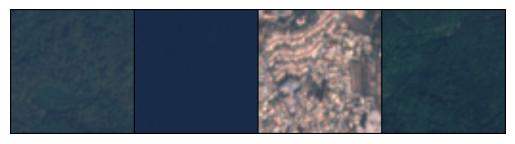

['SeaLake', 'Industrial', 'Forest', 'SeaLake']


In [18]:
inputs_val_nn, classes_val_eu = next(iter(dataloaders_eu['train']))
out_val_nn = torchvision.utils.make_grid(inputs_val_nn)
imshow(out_val_nn)
print([class_names_eu_li[x] for x in classes_val_eu])

In [19]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
        transforms.RandomHorizontalFlip(),
        transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])
}

dataDir = '..\\data\\EuroSAT_RGB'
dataloaders_eu, class_names_eu, _ = createEuroSatDataLoaders(data_transforms, dataDir, split=0.25, batch_size = 4)
class_names_eu_li = list(class_names_eu)

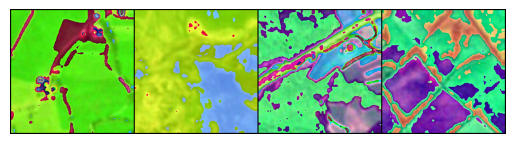

['Pasture', 'AnnualCrop', 'Highway', 'Pasture']


In [20]:
inputs_val_nn, classes_val_eu = next(iter(dataloaders_eu['train']))
out_val_nn = torchvision.utils.make_grid(inputs_val_nn)
imshow(out_val_nn)
print([class_names_eu_li[x] for x in classes_val_eu])

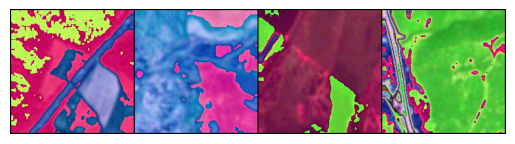

['Highway', 'AnnualCrop', 'Pasture', 'Highway']


In [21]:
inputs_val_nn, classes_val_eu = next(iter(dataloaders_eu['train']))
out_val_nn = torchvision.utils.make_grid(inputs_val_nn)
imshow(out_val_nn)
print([class_names_eu_li[x] for x in classes_val_eu])

In [22]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
}

In [23]:
dataDir = '..\\data\\CUB_200_2011\\CUB_200_2011\\images'
dataloaders_cub, class_names_cub, _ = createEuroSatDataLoaders(data_transforms, dataDir, split=0.25, batch_size = 4, classLimit = 200, image_limit_per_class = 40)
class_names_cub_li = list(class_names_cub)

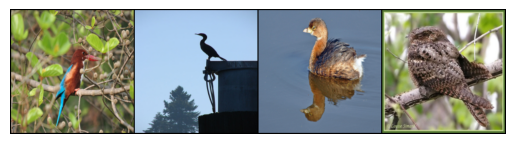

['048.European_Goldfinch', '015.Lazuli_Bunting', '009.Brewer_Blackbird', '118.House_Sparrow']


In [24]:
inputs_test_nn, classes_test = next(iter(dataloaders_cub['test']))
out_test_nn = torchvision.utils.make_grid(inputs_test_nn)
imshow(out_test_nn)
print([class_names_cub_li[x] for x in classes])

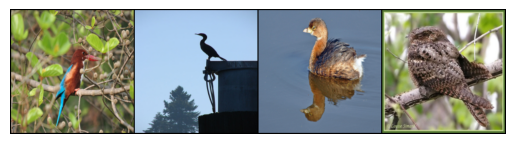

['048.European_Goldfinch', '015.Lazuli_Bunting', '009.Brewer_Blackbird', '118.House_Sparrow']


In [25]:
inputs_test_nn, classes_test = next(iter(dataloaders_cub['test']))
out_test_nn = torchvision.utils.make_grid(inputs_test_nn)
imshow(out_test_nn)
print([class_names_cub_li[x] for x in classes])

In [26]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
        transforms.RandomHorizontalFlip(),
        transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])
}

dataDir = '..\\data\\CUB_200_2011\\CUB_200_2011\\images'
dataloaders_cub, class_names_cub, _ = createEuroSatDataLoaders(data_transforms, dataDir, split=0.25, batch_size = 4, classLimit = 200, image_limit_per_class = 40)
class_names_cub_li = list(class_names_cub)

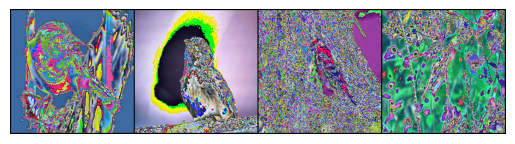

['048.European_Goldfinch', '015.Lazuli_Bunting', '009.Brewer_Blackbird', '118.House_Sparrow']


In [27]:
inputs_test_nn, classes_test = next(iter(dataloaders_cub['test']))
out_test_nn = torchvision.utils.make_grid(inputs_test_nn)
imshow(out_test_nn)
print([class_names_cub_li[x] for x in classes])

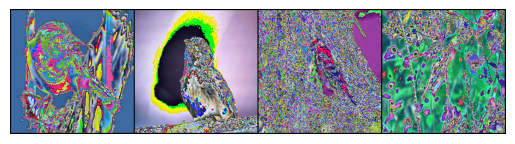

['048.European_Goldfinch', '015.Lazuli_Bunting', '009.Brewer_Blackbird', '118.House_Sparrow']


In [28]:
inputs_test_nn, classes_test = next(iter(dataloaders_cub['test']))
out_test_nn = torchvision.utils.make_grid(inputs_test_nn)
imshow(out_test_nn)
print([class_names_cub_li[x] for x in classes])